# Linear Regression with sklearn and seaborn

For this excersise I have chosen a dataset from [Kaggle](https://www.kaggle.com/) reflecting a timeseries of financial trading data on [Ethereum-Classic-ETC](https://www.kaggle.com/soham1024/ethereum-historical-data) crypto-currency. This dataset was updated Aug 2, 2020
at the time of this analysis and covers historical data at 1 day intervals for the period beginning Mar 2016 to Aug 02, 2020. 

The goal is to Identify:

```
    A) Does a correlation exist between one days' Close Price (shown as price in the dataset) and the previous days' volume. 
    B) If such a correlation exists, can it be used to create a predictive model of the next days' Price? High? Low? Spread?

```

For the purpose of this analysis, Volume will be considered as our constant variable. (should no direct correlations appear to exist with any other category, Volume as a ratio of one other column series will be considered as our next constant)

The Dependent Variable for this analysis will be set to Price(on the subsequent day of the constant)



In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


#TODO: run script that alters csv string representations of floats containing comma's. call below function while iterating through each line. O(N^2)
def pull_comma(csv_str):
    if ',' in csv_str:
       csv_str = csv_str.split(',')
       csv_str = ''.join(csv_str)
       return csv_str
    else:
        return csv_str



In [2]:
df_etc = pd.read_csv('data_csv/Ethereum Historical Data.csv')
df_etc['Date'] = pd.to_datetime(df_etc['Date'])
# df_etc = df_etc.convert_dtypes() # only use if necessary to perform operations on values in DataFrame

#TODO: if pandas cannot work with the string values execute below to_numeric conversions after running script to alter cvs file in above cell.
# pd.to_numeric(df_etc['Price'])
# pd.to_numeric(df_etc['Open'])
# pd.to_numeric(df_etc['High'])
# pd.to_numeric(df_etc['Low'])
# pd.to_numeric(df_etc['Vol'])
# pd.to_numeric(df_etc['Change %'])

df_etc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1607 entries, 0 to 1606
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1607 non-null   datetime64[ns]
 1   Price     1607 non-null   object        
 2   Open      1607 non-null   object        
 3   High      1607 non-null   object        
 4   Low       1607 non-null   object        
 5   Vol.      1607 non-null   object        
 6   Change %  1607 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 88.0+ KB


In [3]:

df_etc.describe()



,Date,Price,Open,High,Low,Vol.,Change %
count,1607,1607,1607,1607,1607,1607,1607
unique,1607,1499,1492,1490,1482,1376,1014
top,2019-04-29 00:00:00,10.16,10.16,10.16,10.16,-,0.00%
freq,1,9,8,7,7,8,14
first,2016-03-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-08-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


### Setting constant, dependent, train_test_split, and Instantiating LinearRegression



In [48]:
# to get a comparison of Previous day Vol to Next day Price, we drop the last row of the constant and the first row of the dependent. the crucial peice is the dependent, dropping from constant ensures the same shape of data to be analyzed
# bin_var = 1000
# short_df = df_etc.head(bin_var)

const_df = const_df.drop(index=1606)
const_df = const_df[['Vol.']].replace(const_df['Vol.'].values, [pd.to_numeric((val[0:-1])) if val[-1] == 'M' else 0 if val == '-' else (pd.to_numeric(val[0:-1]) * .001) for val in const_df['Vol.']])

dep_df = const_df.drop(index=0)
dep_df = dep_df[['Price']].replace(dep_df['Price'].values, [pd.to_numeric(pull_comma(val)) for val in dep_df['Price']])

X = const_df['Vol.'].values # X feature == Previous Day Vol.
X = X.reshape(-1,1)
y = dep_df['Price'].values  # y == Next day closing 'Price' in Dollars

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=100)

print(f"X_train shape [{x_train.shape}]")
print(f"y_train shape [{y_train.shape}]")
print(f"X_test shape [{x_test.shape}]")
print(f"X_test shape [{y_test.shape}]")






KeyError: '[1606] not found in axis'

Text(0.5, 1.0, 'Identify Correlation Prev Vol to Next Price')

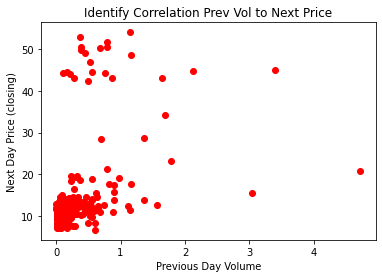

In [20]:
plt.scatter(x_train, y_train, color='red')
plt.xlabel('Previous Day Volume')
plt.ylabel('Next Day Price (closing)')
plt.title('Identify Correlation Prev Vol to Next Price')



In [49]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)
print(f'Train Accuracy {round(lm.score(x_train, y_train) * 100, 2)}%')
print(f'Test Accuracy {round(lm.score(x_test, y_test) * 100, 2)}%')


Train Accuracy 22.48%
Test Accuracy 21.84%
